# Understanding Variance - The Foundation of PCA

## Introduction

Welcome to your PCA learning journey! This notebook introduces the fundamental concept behind PCA: **variance**.

### What You'll Learn
1. Why we need dimensionality reduction
2. What variance means and why it matters
3. How variance relates to information in data
4. Visual intuition for PCA concepts

### The Big Idea
PCA finds directions in your data where variance (spread) is highest, because **high variance = more information**.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. The Problem: High-Dimensional Data

### Agricultural Example

Imagine you're a soil scientist with data from 1000 farms. For each farm, you measured:
- pH
- Nitrogen (N)
- Phosphorus (P)
- Potassium (K)
- Organic matter
- Sand %
- Silt %
- Clay %
- Moisture
- 10 micronutrients (Fe, Zn, Cu, Mn, etc.)

That's **20 features** per farm! Problems:
1. Hard to visualize
2. Slow to process
3. Many features are correlated
4. Some features add little information

**Solution**: PCA can reduce these 20 features to 2-3 components while keeping most information!

## 2. Understanding Variance

### What is Variance?

Variance measures how spread out data is. High variance means data points are spread far from the mean.

**Formula**: 
$$\text{Variance} = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

Where:
- $x_i$ = each data point
- $\bar{x}$ = mean of all points
- $n$ = number of points

In [3]:
# Example: Soil pH measurements from two fields

# Field A: pH values very consistent
field_a_ph = np.array([6.8, 6.9, 7.0, 7.0, 6.9, 7.1, 6.8, 7.0])

# Field B: pH values vary widely
field_b_ph = np.array([5.5, 8.2, 6.0, 7.5, 5.8, 8.0, 6.2, 7.8])

# Calculate variance
var_a = np.var(field_a_ph)
var_b = np.var(field_b_ph)

print(f"Field A - Mean: {field_a_ph.mean():.2f}, Variance: {var_a:.4f}")
print(f"Field B - Mean: {field_b_ph.mean():.2f}, Variance: {var_b:.4f}")
print(f"\nField B has {var_b/var_a:.1f}x more variance than Field A")

Field A - Mean: 6.94, Variance: 0.0098
Field B - Mean: 6.88, Variance: 1.0669

Field B has 108.4x more variance than Field A


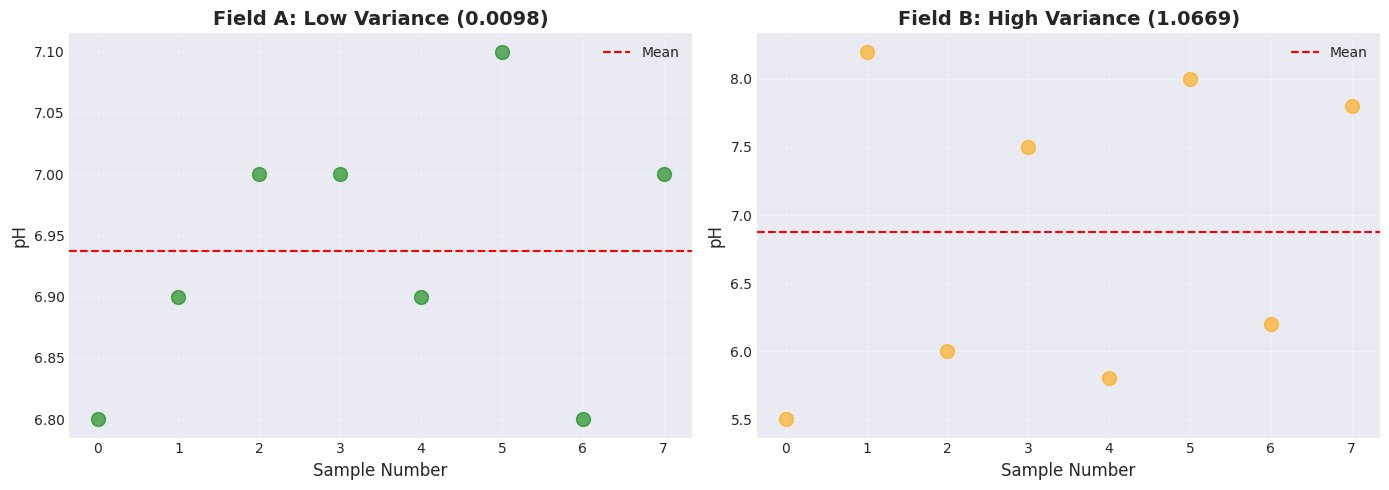


💡 Insight: Field B's pH varies more - this tells us the soil is less uniform.
   High variance = more information about variation in the field.


In [4]:
# Visualize the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Field A
ax1.scatter(range(len(field_a_ph)), field_a_ph, s=100, alpha=0.6, color='green')
ax1.axhline(field_a_ph.mean(), color='red', linestyle='--', label='Mean')
ax1.set_xlabel('Sample Number', fontsize=12)
ax1.set_ylabel('pH', fontsize=12)
ax1.set_title(f'Field A: Low Variance ({var_a:.4f})', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Field B
ax2.scatter(range(len(field_b_ph)), field_b_ph, s=100, alpha=0.6, color='orange')
ax2.axhline(field_b_ph.mean(), color='red', linestyle='--', label='Mean')
ax2.set_xlabel('Sample Number', fontsize=12)
ax2.set_ylabel('pH', fontsize=12)
ax2.set_title(f'Field B: High Variance ({var_b:.4f})', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Insight: Field B's pH varies more - this tells us the soil is less uniform.")
print("   High variance = more information about variation in the field.")

## 3. Variance = Information

### Key Insight

**High variance features contain more information** because they help distinguish between different samples.

- Low variance: Almost all values are the same → doesn't help distinguish samples
- High variance: Values differ a lot → helps us tell samples apart

PCA's goal: **Find directions where variance is maximum**

In [5]:
# Example: Two features with different variances

# Generate sample soil data
n_samples = 100

# Feature 1: Nitrogen content (high variance)
nitrogen = np.random.normal(50, 20, n_samples)  # mean=50, std=20

# Feature 2: pH (low variance)
ph = np.random.normal(7, 0.5, n_samples)  # mean=7, std=0.5

print(f"Nitrogen - Variance: {np.var(nitrogen):.2f}")
print(f"pH - Variance: {np.var(ph):.4f}")
print(f"\nNitrogen has {np.var(nitrogen)/np.var(ph):.0f}x more variance than pH")

Nitrogen - Variance: 326.61
pH - Variance: 0.2251

Nitrogen has 1451x more variance than pH


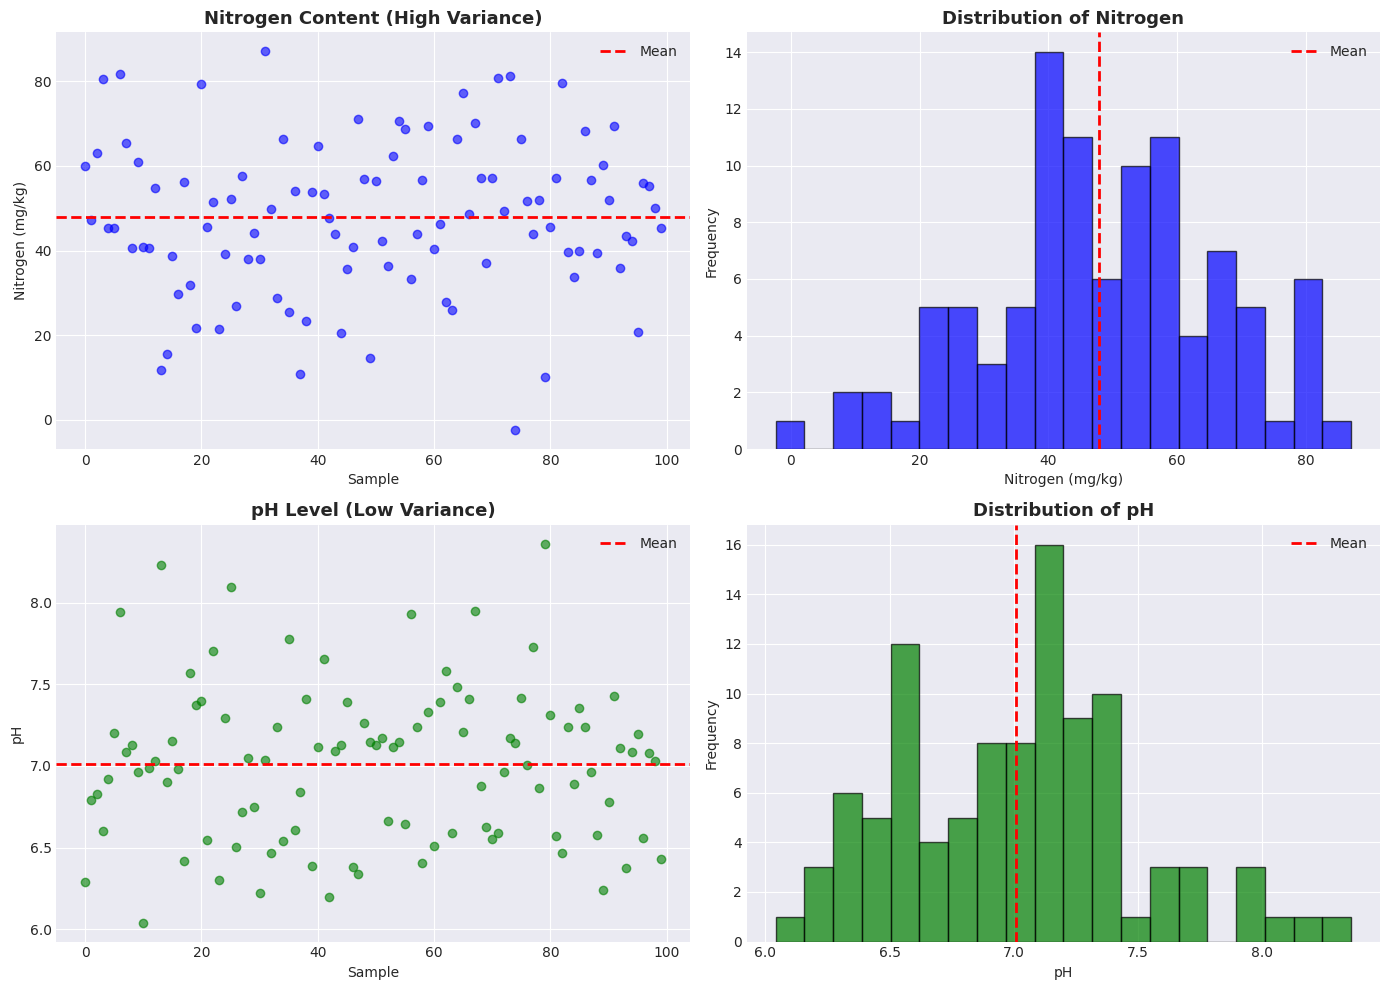


💡 Insight: Nitrogen varies widely (wide spread), while pH is consistent (narrow spread).
   Nitrogen would be more useful for distinguishing between different soil samples.


In [6]:
# Visualize both features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Nitrogen - scatter plot
axes[0, 0].scatter(range(n_samples), nitrogen, alpha=0.6, color='blue')
axes[0, 0].axhline(nitrogen.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].set_title('Nitrogen Content (High Variance)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Sample')
axes[0, 0].set_ylabel('Nitrogen (mg/kg)')
axes[0, 0].legend()

# Nitrogen - histogram
axes[0, 1].hist(nitrogen, bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].axvline(nitrogen.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 1].set_title('Distribution of Nitrogen', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Nitrogen (mg/kg)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# pH - scatter plot
axes[1, 0].scatter(range(n_samples), ph, alpha=0.6, color='green')
axes[1, 0].axhline(ph.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 0].set_title('pH Level (Low Variance)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Sample')
axes[1, 0].set_ylabel('pH')
axes[1, 0].legend()

# pH - histogram
axes[1, 1].hist(ph, bins=20, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].axvline(ph.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 1].set_title('Distribution of pH', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('pH')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n💡 Insight: Nitrogen varies widely (wide spread), while pH is consistent (narrow spread).")
print("   Nitrogen would be more useful for distinguishing between different soil samples.")

## 4. 2D Example: Finding the Direction of Maximum Variance

Let's visualize what PCA does with a simple 2D example.

In [ ]:
# Generate correlated 2D data (like soil nitrogen and phosphorus)
np.random.seed(42)
n = 200

# Generate base data
x = np.random.normal(0, 1, n)
y = 0.8 * x + np.random.normal(0, 0.3, n)  # y correlated with x
# y = np.random.normal(0, 0.3, n)  # y correlated with x (Tested with no correlation)

# Create data matrix
data = np.column_stack([x, y])

print(f"Data shape: {data.shape}")
print(f"Feature 1 variance: {np.var(data[:, 0]):.3f}")
print(f"Feature 2 variance: {np.var(data[:, 1]):.3f}")

Data shape: (200, 2)
Feature 1 variance: 0.862
Feature 2 variance: 0.087


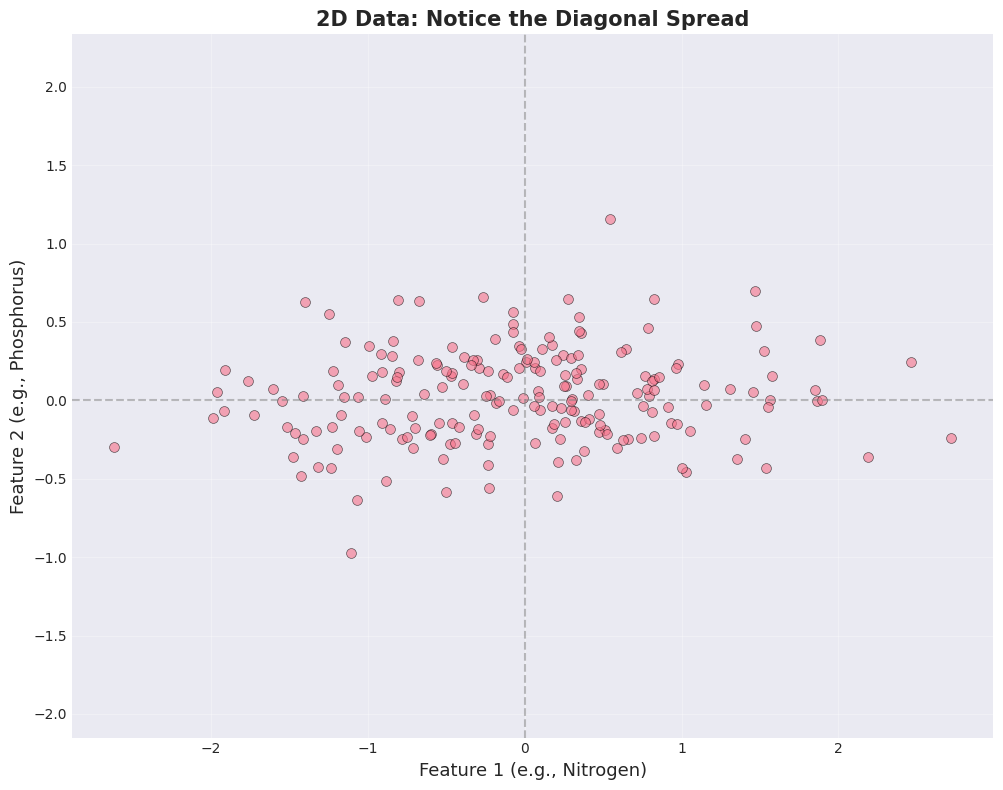


💡 Observation: The data spreads more along a diagonal direction.
   This diagonal is the direction of maximum variance - PCA will find it!


In [10]:
# Visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, s=50, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Feature 1 (e.g., Nitrogen)', fontsize=13)
plt.ylabel('Feature 2 (e.g., Phosphorus)', fontsize=13)
plt.title('2D Data: Notice the Diagonal Spread', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n💡 Observation: The data spreads more along a diagonal direction.")
print("   This diagonal is the direction of maximum variance - PCA will find it!")

## 5. The PCA Intuition

### What PCA Does

1. **Finds the direction** where data varies the most (highest variance)
2. This becomes the **first principal component (PC1)**
3. **Finds a perpendicular direction** with next highest variance
4. This becomes the **second principal component (PC2)**
5. And so on...

### Why This Helps

- PC1 captures most information
- PC2 captures second most
- Later components capture less and less
- We can keep just PC1 and PC2 and discard the rest!

This is **dimensionality reduction**.

In [ ]:
# Manual calculation of the direction of maximum variance
# (We'll use proper PCA in later notebooks)

# Center the data (subtract mean)
data_centered = data - data.mean(axis=0)

# Calculate covariance matrix
cov_matrix = np.cov(data_centered.T)

# Get eigenvectors (directions) and eigenvalues (variance in those directions)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue (variance)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Principal Components (directions of maximum variance):")
print(f"\nPC1 direction: {eigenvectors[:, 0]}")
print(f"PC1 variance: {eigenvalues[0]:.3f}")
print(f"\nPC2 direction: {eigenvectors[:, 1]}")
print(f"PC2 variance: {eigenvalues[1]:.3f}")
print(f"\nPC1 captures {100*eigenvalues[0]/eigenvalues.sum():.1f}% of total variance")

In [ ]:
# Visualize the principal components
plt.figure(figsize=(10, 8))

# Plot data
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, s=50, edgecolors='k', linewidths=0.5, label='Data points')

# Plot principal components as arrows
origin = data.mean(axis=0)
scale = 2.5

# PC1 - direction of maximum variance
plt.arrow(origin[0], origin[1], 
          scale*eigenvectors[0, 0], scale*eigenvectors[1, 0],
          head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=3,
          label=f'PC1 (captures {100*eigenvalues[0]/eigenvalues.sum():.1f}% variance)')

# PC2 - perpendicular direction
plt.arrow(origin[0], origin[1], 
          scale*eigenvectors[0, 1], scale*eigenvectors[1, 1],
          head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=3,
          label=f'PC2 (captures {100*eigenvalues[1]/eigenvalues.sum():.1f}% variance)')

plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Feature 1 (e.g., Nitrogen)', fontsize=13)
plt.ylabel('Feature 2 (e.g., Phosphorus)', fontsize=13)
plt.title('Principal Components: Directions of Maximum Variance', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n💡 Key Insight: PC1 (red arrow) points in the direction where data spreads most!")
print("   PC2 (blue arrow) is perpendicular and captures remaining variance.")
print("   If we project data onto PC1, we keep most information but use only 1 dimension!")

## 6. Key Takeaways

### What You Learned

1. **Variance measures spread** in data
2. **High variance = more information**
3. **PCA finds directions of maximum variance**
4. **These directions are Principal Components**
5. **We can reduce dimensions by keeping top PCs**

### Why This Matters

In agriculture:
- Soil has many correlated features (N, P, K often vary together)
- PCA finds underlying patterns ("soil fertility factor", "texture factor", etc.)
- We can visualize complex soil data in 2D/3D
- We can identify which combinations of features matter most

### Next Steps

In the next notebook, we'll dive into:
- **Covariance**: How features vary together
- **Eigenvectors & Eigenvalues**: The math behind PCA
- **Step-by-step PCA calculation**

## Exercise (Optional)

Try this on your own:

1. Generate your own 2D dataset with different correlations
2. Calculate variance for each dimension
3. Visualize the data and see if you can identify the direction of maximum variance by eye
4. Compare with the calculated principal components

```python
# Your code here
```

---

**Congratulations!** You've built the intuition for PCA. 

Continue to the next notebook: `02_covariance_eigenvectors.ipynb`